# Bias-Variance Trade-Off - Lab

## Introduction

In this lab, you'll practice your knowledge on the bias-variance trade-off!

## Objectives

You will be able to: 
- Look at an example where Polynomial regression leads to overfitting
- Understand how bias-variance trade-off relates to underfitting and overfitting

## Let's get started!

We'll try to predict some movie revenues based on certain factors, such as ratings and movie year.

In [277]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_excel('./movie_data_detailed_with_ols.xlsx')
df.head()

,budget,domgross,title,Response_Json,Year,imdbRating,Metascore,imdbVotes,Model
0,13000000,25682380,21 &amp; Over,0,2008,6.8,48,206513,4.912759e+07
1,45658735,13414714,Dredd 3D,0,2012,0.0,0,0,2.267265e+05
2,20000000,53107035,12 Years a Slave,0,2013,8.1,96,537525,1.626624e+08
3,61000000,75612460,2 Guns,0,2013,6.7,55,173726,7.723381e+07
4,40000000,95020213,42,0,2013,7.5,62,74170,4.151958e+07


In [279]:
# Only keep four predictors and transform the with MinMaxScaler

scale = MinMaxScaler()
target = scale.fit_transform(df[['domgross']].values)
df = df[[ "budget", "imdbRating", "Metascore", "imdbVotes"]]
transformed = scale.fit_transform(df)
pd_df = pd.DataFrame(transformed, columns = df.columns)
pd_df.head()

/opt/conda/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,budget,imdbRating,Metascore,imdbVotes
0,0.034169,0.839506,0.500000,0.384192
1,0.182956,0.000000,0.000000,0.000000
2,0.066059,1.000000,1.000000,1.000000
3,0.252847,0.827160,0.572917,0.323196
4,0.157175,0.925926,0.645833,0.137984


## Split the data into a test and train set

In [280]:
# domgross is the outcome variable
from sklearn.model_selection import train_test_split

In [281]:
#Your code here
X_train,X_test,y_train,y_test = train_test_split(pd_df,target)

## Fit a regression model to the training data and look at the coefficients

In [294]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import *
rfr = RandomForestRegressor(n_estimators=100,max_depth=2).fit(X_train,y_train)
rfr.score(X_test,y_test)


/opt/conda/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


-0.26602867254528983

In [287]:
print(rfr.predict(X_train)[0])
print(y_train)

0.17853025802868142
[[0.14803875]
 [0.13589058]
 [0.05411816]
 [0.14491417]
 [0.08521178]
 [0.23362505]
 [0.37096905]
 [0.02868842]
 [0.10757336]
 [0.07997047]
 [0.29693477]
 [0.12875958]
 [1.        ]
 [0.07503123]
 [0.05532489]
 [0.60304149]
 [0.02377895]
 [0.18371859]
 [0.228559  ]
 [0.0522271 ]
 [0.30434779]
 [0.16246986]]


## Plot the training predictions against the actual data (y_hat_train vs. y_train)

Let's plot our result for the train data. Because we have multiple predictors, we can not simply plot the income variable X on the x-axis and target y on the y-axis. Lets plot 
- a line showing the diagonal of y_train. The actual y_train values are on this line
- next, make a scatter plot that takes the actual y_train on the x-axis and the predictions using the model on the y-axis. You will see points scattered around the line. The horizontal distances between the points and the lines are the errors.

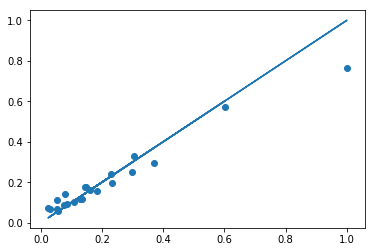

In [288]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_train,rfr.predict(X_train))
plt.plot(y_train, y_train, label='Actual Data')
# your code here

## Plot the test predictions against the actual data (y_hat_test vs. y_test)

Do the same thing for the test data.

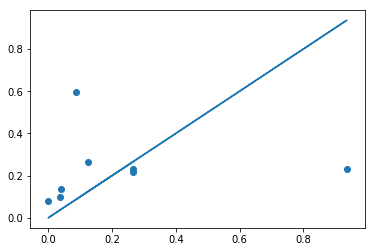

In [289]:
# your code here
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_test,rfr.predict(X_test))
plt.plot(y_test, y_test, label='Actual Data')

## Calculate the bias
Write a formula to calculate the bias of a models predictions given the actual data: $Bias(\hat{f}(x)) = E[\hat{f}(x)-f(x)]$   
(The expected value can simply be taken as the mean or average value.)  


In [290]:
import numpy as np
def bias(y, y_hat):
    return np.mean(y_hat-y)

## Calculate the variance
Write a formula to calculate the variance of a model's predictions: $Var(\hat{f}(x)) = E[\hat{f}(x)^2] - \big(E[\hat{f}(x)]\big)^2$

In [291]:
def variance(y_hat):
    return np.mean([i**2 for i in y_hat]) - np.mean(y_hat)**2

## Use your functions to calculate the bias and variance of your model. Do this seperately for the train and test sets.

In [292]:
# code for train set bias and variance
print(bias(y_train,rfr.predict(X_train)))
print(variance(rfr.predict(X_train)))

-0.006552631319099689
0.02810018298896976


In [293]:
# code for test set bias and variance
print(bias(y_test,rfr.predict(X_test)))
print(variance(rfr.predict(X_test)))

0.012841724575935728
0.0230291309490996


## Describe in words what these numbers can tell you.

Your description here (this cell is formatted using markdown)

## Overfit a new model by creating additional features by raising current features to various powers.

Use `PolynomialFeatures` with degree 3. 

**Important note:** By including this, you don't only take polynomials of single variables, but you also combine variables, eg:

$ \text{Budget} * \text{MetaScore} ^ 2 $

What you're essentially doing is taking interactions and creating polynomials at the same time! Have a look at how many columns we get using `np.shape`. Quite a few!


In [355]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(10)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

rfr = RandomForestRegressor().fit(X_train_poly,y_train)
rfr.score(X_test_poly,y_test)

/opt/conda/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


0.0037876679487981457

## Plot your overfitted model's training predictions against the actual data

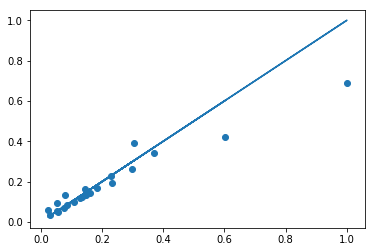

In [352]:
# your code here
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_train,rfr.predict(X_train_poly))
plt.plot(y_train, y_train, label='Actual Data')

Wow, we almost get a perfect fit!

## Calculate the bias and variance for the train set

In [353]:
# your code here
print(bias(y_train,rfr.predict(X_train_poly)))
print(variance(rfr.predict(X_train_poly)))

-0.019991776036801506
0.023292450040461134


## Plot your overfitted model's test predictions against the actual data.

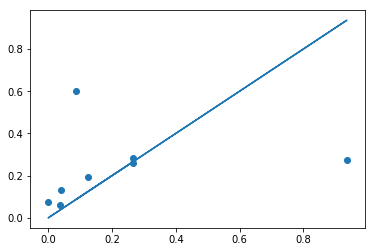

In [354]:
# your code here
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_test,rfr.predict(X_test_poly))
plt.plot(y_test, y_test, label='Actual Data')

##  Calculate the bias and variance for the train set.

In [346]:
# your code here
print(bias(y_test,rfr.predict(X_test_poly)))
print(variance(rfr.predict(X_test_poly)))

0.03570272612542384
0.02348412099771631


## Describe what you notice about the bias and variance statistics for your overfit model

The bias and variance for the test set both increased drastically in the overfit model.

## Level Up - Optional

In this lab we went from 4 predictors to 35 by adding polynomials and interactions, using `PolynomialFeatures`. That being said, where 35 leads to overfitting, there are probably ways to improve by just adding a few polynomials. Feel free to experiment and see how bias and variance improve!

## Summary

This lab gave you insight in how bias and variance change for a training and test set by using a pretty "simple" model, and a very complex model. 